<a href="https://colab.research.google.com/github/washof/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

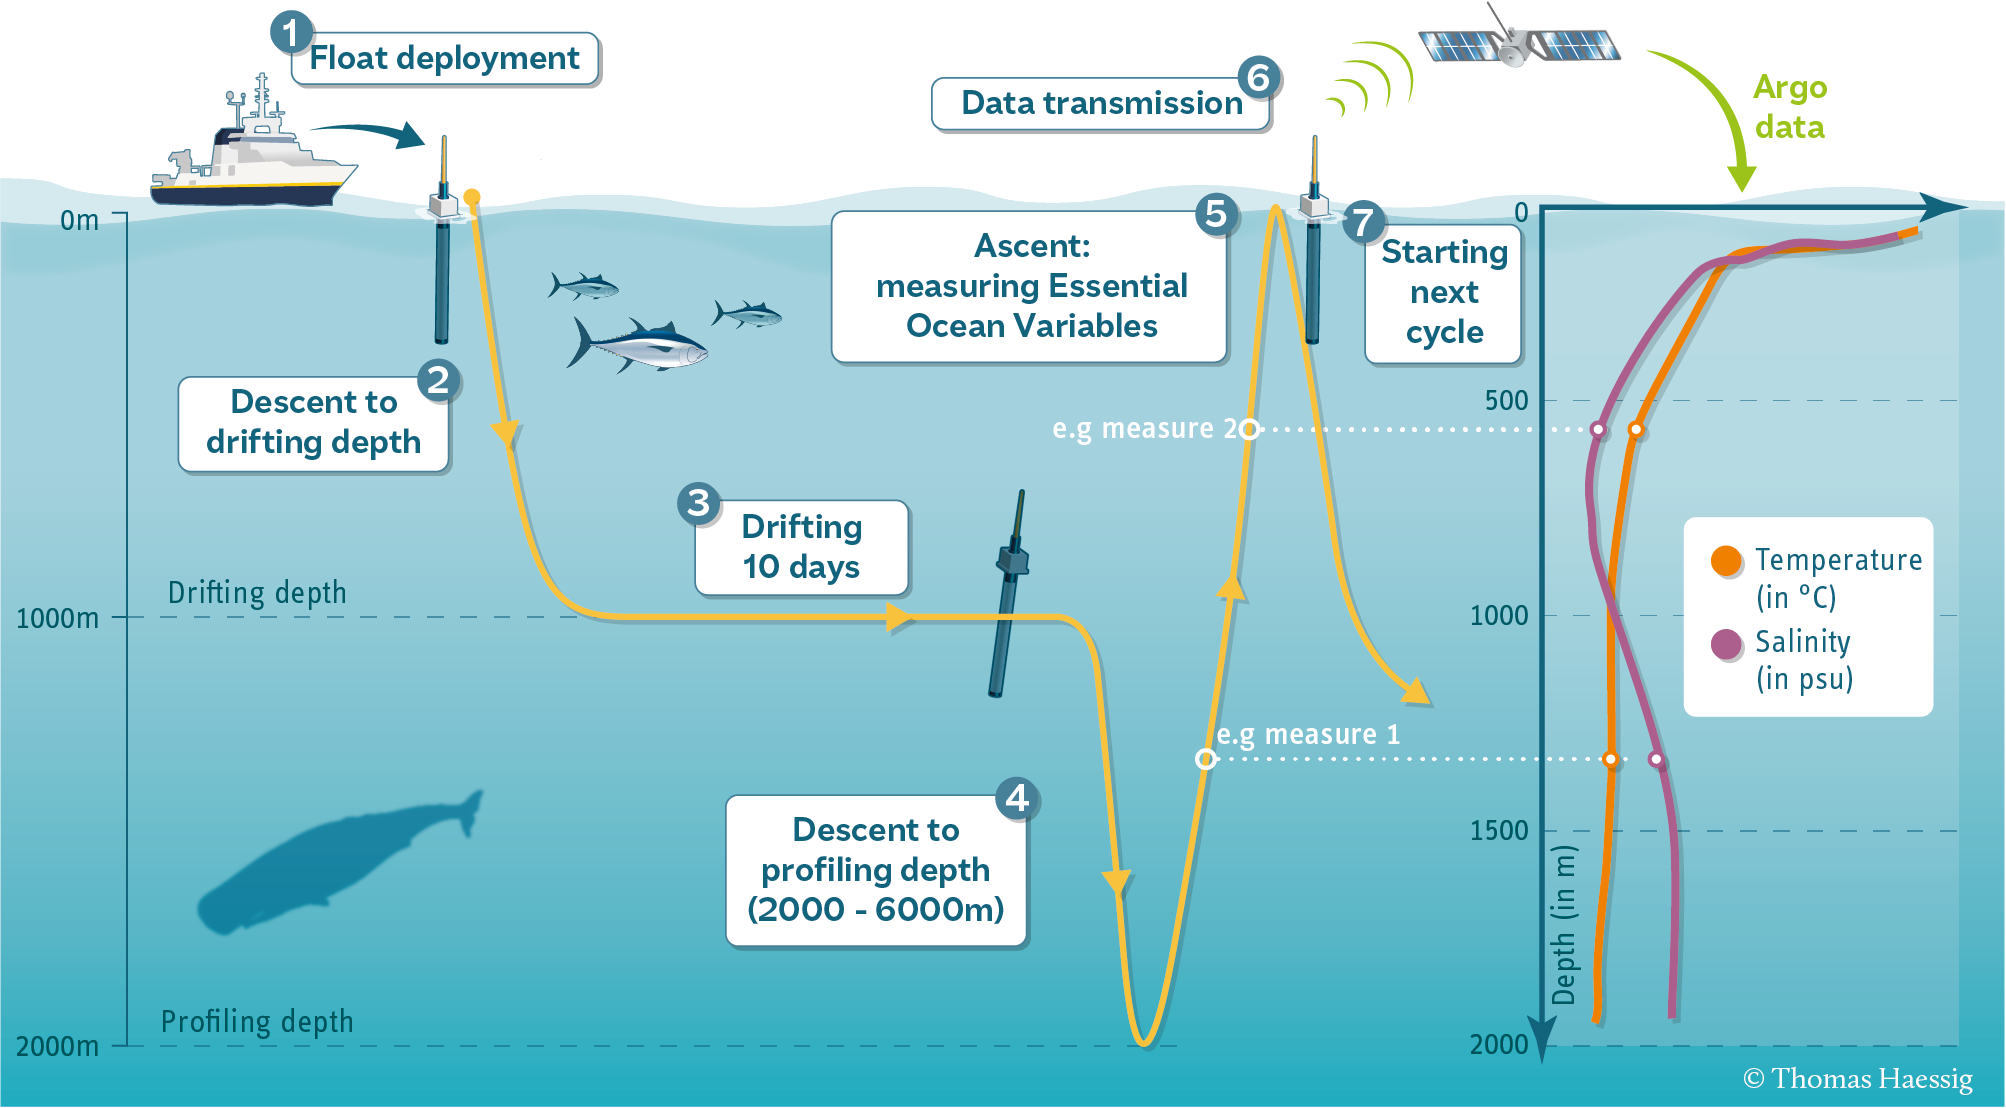


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [2]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [12]:
for file in files:
  print(file)

/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [17]:
#@title Code à compléter (au besoin)
P, date, lat, S, level, lon, T = [np.load(files[i]) for i in range(len(files))]
print(P)

[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]


**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [18]:
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [27]:
level_arange = np.arange(0, 78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [ ]:
#@title Code à compléter (au besoin)
level_arange = np.arange(___,___)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [32]:
np.testing.assert_equal(level, level_arange)

In [ ]:
#@title Code à compléter (au besoin)
np.___.___(___,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [40]:
level_linspace = np.linspace(0, 77, num=78)
print(level_linspace)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,___,___)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [41]:
np.testing.assert_equal(level, level_linspace)

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`,
`lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [51]:
print(T.shape)
print(lon.shape)

(78, 75)
(75,)


In [ ]:
#@title Code à compléter (au besoin)
___.shape
___.___

D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [53]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [52]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.3 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [55]:
cons_temp = CT_from_t(S, T, P)

In [ ]:
#@title Code à compléter (au besoin)
___ = CT_from_t(___,___,___)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [57]:
relative_density = a * S + b * cons_temp + c * cons_temp**2
print(relative_density)

[[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


In [ ]:
#@title Code à compléter (au besoin)
___ = ___

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [58]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

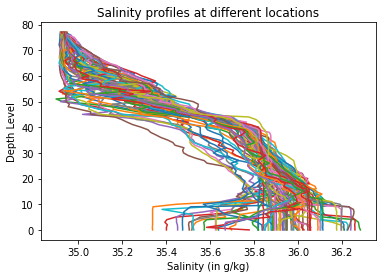

Text(0.5, 1.0, 'Temperature function of depth')

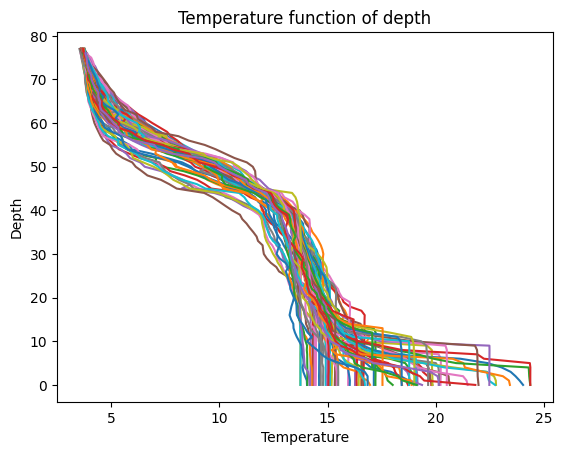

In [60]:
plt.plot(T, level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Temperature") # Prend une chaîne de caractères comme argument
plt.ylabel("Depth")
plt.title("Temperature function of depth")

Faites plus de plots ci-dessous:

Text(0, 0.5, 'depth')

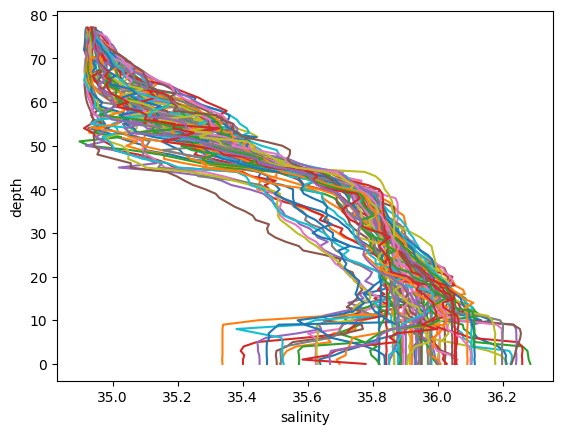

In [62]:
plt.plot(S, level)
plt.xlabel("salinity")
plt.ylabel("depth")

Text(0, 0.5, 'depth')

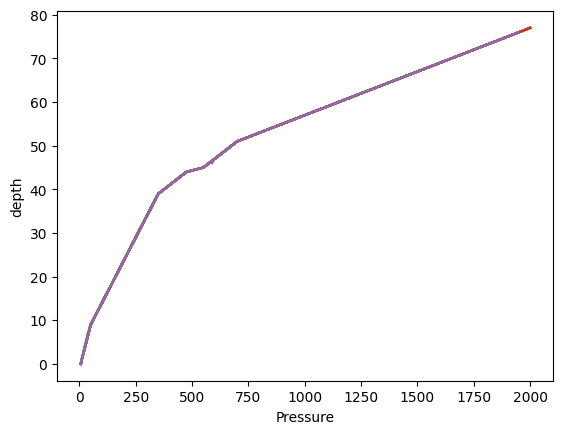

In [66]:
plt.plot(P, level)
plt.xlabel("Pressure")
plt.ylabel("depth")

Text(0, 0.5, 'depth')

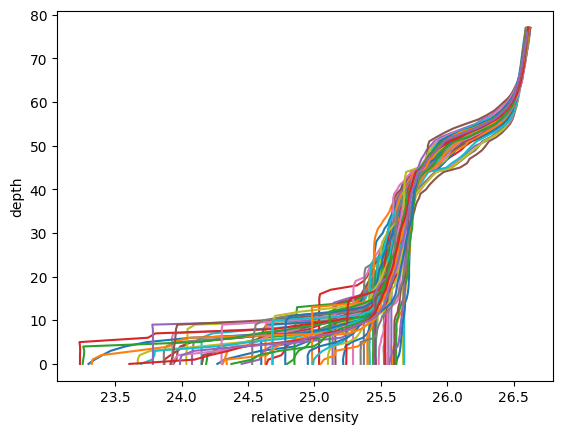

In [67]:
plt.plot(relative_density, level)
plt.xlabel("relative density")
plt.ylabel("depth")

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [97]:
mean_T = np.mean(T, axis=1)
mean_S = np.mean(S, axis=1)
mean_P = np.mean(P, axis=1)
mean_dens = np.mean(relative_density, axis=1)
print(mean_T, mean_T.shape, T.shape)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan] (78,) (78, 75)


In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,axis=___)
___
___
___

... et les écarts types.

In [110]:
T_std = np.std(T, axis=1)
S_std = np.std(S, axis=1)
P_std = np.std(P, axis=1)
dens_std = np.std(relative_density, axis=1)

In [ ]:
#@title Code à compléter (au besoin)
___ = ___.___(___,___)

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [98]:
np.testing.assert_equal(mean_T, level.shape)

AssertionError: 
Arrays are not equal

(shapes (78,), (1,) mismatch)
 x: array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,...
 y: array([78])

In [ ]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(___.shape,lev.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

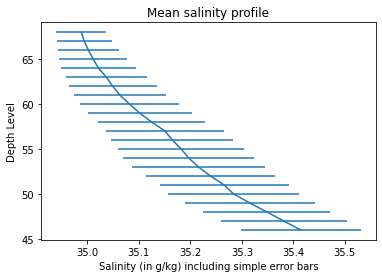

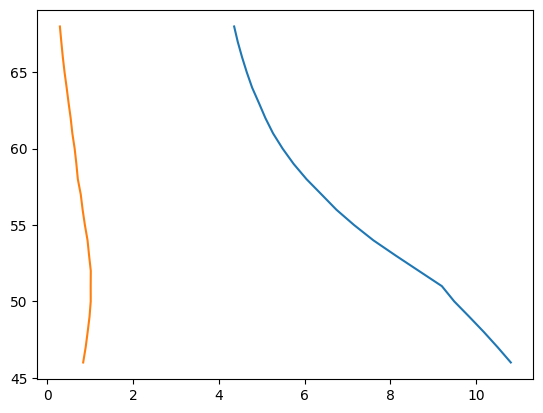

In [104]:
plt.plot(mean_T, level)
plt.plot(T_std, level)

Text(0.5, 1.0, 'mean T and error bars')

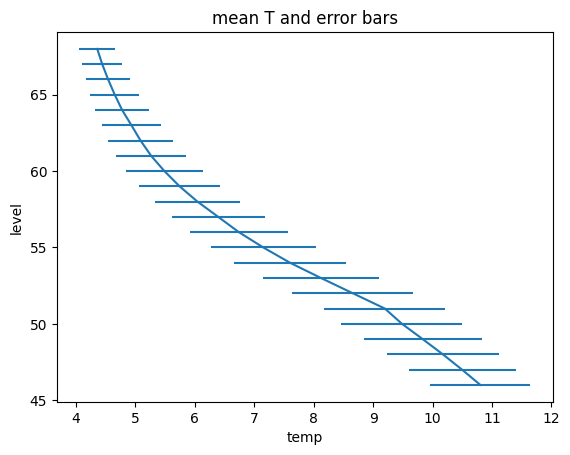

In [108]:
plt.errorbar(mean_T , level ,xerr=T_std)
plt.xlabel("temp")
plt.ylabel("level")
plt.title("mean T and error bars")

Encore trois plots et nous serons prêts 🙂 .

<ErrorbarContainer object of 3 artists>

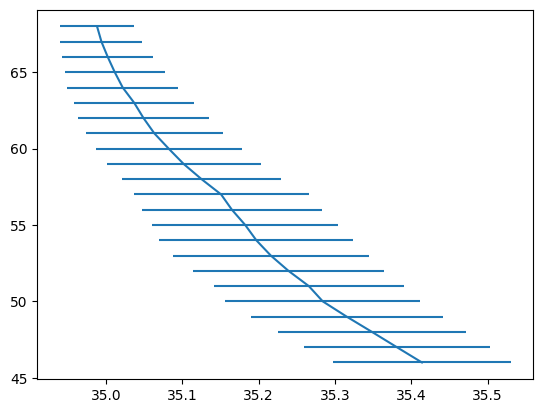

In [111]:
plt.errorbar(mean_S, level, xerr=S_std)

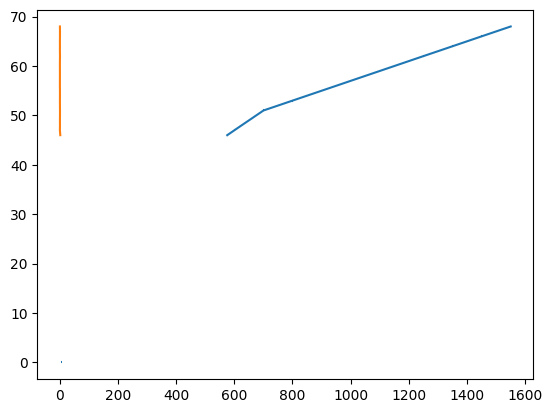

In [114]:
plt.errorbar(mean_P, level, xerr=P_std)
plt.plot(P_std, level)

<ErrorbarContainer object of 3 artists>

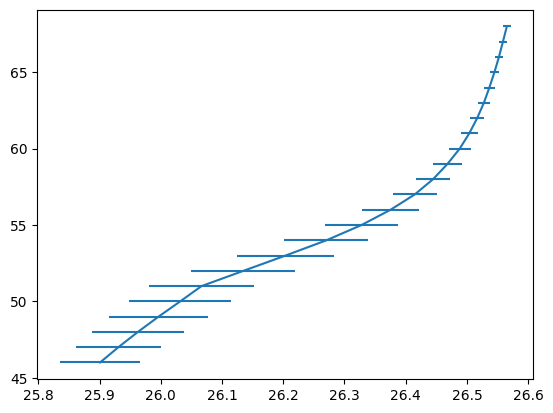

In [113]:
plt.errorbar(mean_dens, level, xerr=dens_std)

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [120]:
T_nanmean = np.nanmean(T)
P_nanmean = np.nanmean(P)
S_nanmean = np.nanmean(S)
dens_nanmean = np.nanmean(relative_density)
print(P_nanmean, T_nanmean, S_nanmean, dens_nanmean)

617.7636946613931 11.104955983298781 35.53375800851532 25.83964391014039


De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [121]:
T_nanstd = np.nanstd(T)
P_nanstd = np.nanstd(P)
S_nanstd = np.nanstd(S)
dens_nanstd = np.nanstd(relative_density)
print(P_nanstd, T_nanstd, S_nanstd, dens_nanstd)

586.4118096127003 4.660526903885564 0.39617465005493235 0.5787189163493786


ValueError: 'x' and 'y' must have the same size

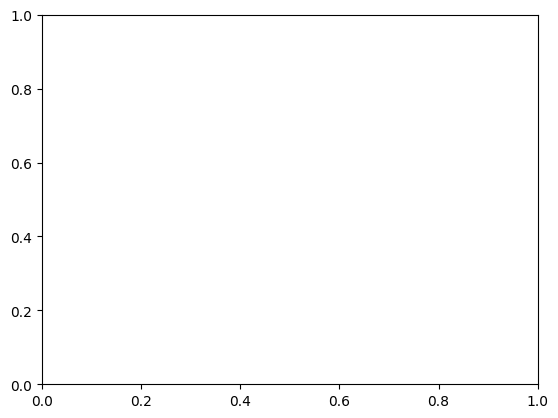

In [122]:
plt.errorbar(P_nanmean, level, xerr=P_nanstd)
plt.plot(P_std, level)

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'lat and lon of the ARGO booeys')

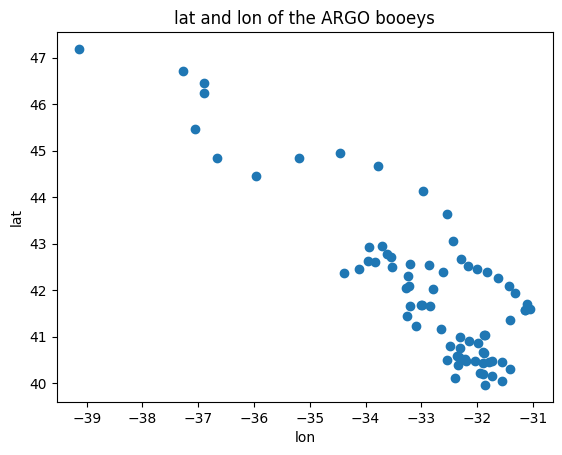

In [124]:
plt.scatter(lon, lat)
plt.ylabel("lat")
plt.xlabel("lon")
plt.title("lat and lon of the ARGO booeys")

In [ ]:
#@title Code à compléter (au besoin)
plt.scatter(___,___)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [125]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [127]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def earth_mass_ratio(planet_mass):
  return planet_mass / planetdict['terre']
# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
earth_mass_ratio(planetdict['jupiter'])

317.92294807370183

In [ ]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(______=____):
  return _________/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(____________)

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [141]:
# Écrivez votre fonction ici
def earth_jupiter_ratio(planet, ratio):
  if ratio=='jupiter':
   return planet/planetdict['jupiter']
  elif ratio=='terre':
   return planet/planetdict['terre']
  else:
    None

earth_jupiter_ratio(planetdict['jupiter'], 'jupiter')


# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

1.0

In [ ]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(______=____,ourplanet='jupiter') :
  return ___________/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],_____),convert_m_Mterrejupiter(planetdict['jupiter'],______))

In [142]:
# Stocker le Mjupiter pour Q3
Mjupiter = earth_jupiter_ratio(planetdict['jupiter'], 'jupiter')


**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass, planet=planetdict[]):
  a = mass/
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)

In [144]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet=planetdict['mars']) :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict['mars'] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments('terre','mars'))

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?